This image is: <class 'numpy.ndarray'> with dimensions: (500, 1140, 3)


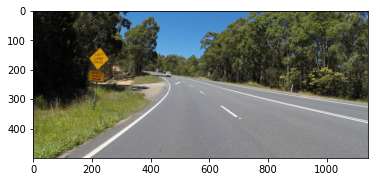

In [29]:
################### BLINKAH Lane Detection ###################

# shoutout Matt Hardwick from https://medium.com/@mrhwick/simple-lane-detection-with-opencv-bfeb6ae54ec0
# Loading an image into memory and cropping to a region of interest

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# reading in an image
image = mpimg.imread('sample_lane.jpg')

# printing out some stats and plotting the image
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()

In [30]:
height = image.shape[0]
width = image.shape[1]
color_channels = image.shape[2]

In [31]:
# region_of_interest_vertices = [
#    (0, height),
#    (width / 2, height / 2),
#    (width, height),]

# actual cropping of image, defining region_of_interest()

import numpy as np
import cv2
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    match_mask_color = (255,) * channel_count
      
    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)
    
    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

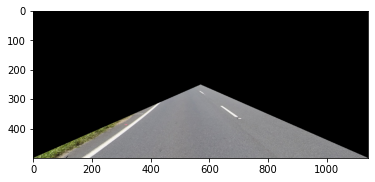

In [32]:
# runnning cropping function on our image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('sample_lane.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)
plt.show()

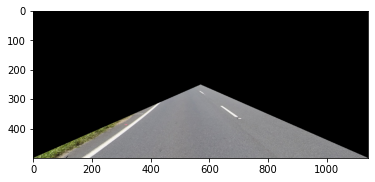

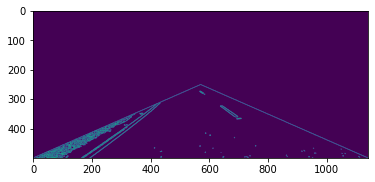

In [33]:
# detecting edges in the cropped image
# grayscale conversion and canny edge detection using single intensity values as each pixel in the image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('sample_lane.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)

# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

# Call Canny Edge Detection here.
cannyed_image = cv2.Canny(gray_image, 100, 200)
plt.figure()
plt.imshow(cannyed_image)
plt.show()

In [34]:
# image now contains single pixels indicative of edges as well as edge of region of interest UH OH!!!

# SOLUTION: Place region of interest cropping after Canny edge detection

# as shown below #

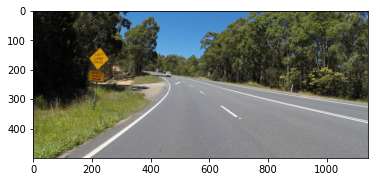

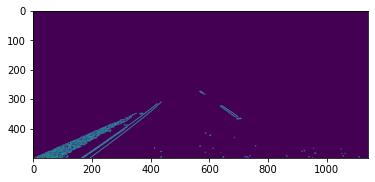

In [35]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # <-- This line altered for grayscale.
    
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('sample_lane.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
# Moved the cropping operation to the end of the pipeline.
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)
plt.figure()
plt.imshow(cropped_image)
plt.show()

In [36]:
# Generate lines from edge pixels using Hough transforms

image = mpimg.imread('sample_lane.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 200, 300)
cropped_image = region_of_interest(
    cannyed_image,
    np.array(
        [region_of_interest_vertices],
        np.int32
    ),
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines)

[[[ 21 499 293 378]]

 [[208 474 282 421]]

 [[283 418 403 331]]

 [[ 26 499 289 381]]

 [[151 457 275 394]]

 [[ 26 495 319 365]]

 [[313 411 420 324]]

 [[ 72 497 287 387]]

 [[ 30 498 280 386]]

 [[ 51 499 195 425]]

 [[171 498 298 406]]

 [[ 78 499 302 370]]

 [[ 60 498 267 393]]

 [[ 23 495 275 383]]

 [[ 72 499 252 407]]

 [[193 499 301 420]]

 [[ 46 499 164 439]]

 [[166 499 215 464]]

 [[ 37 498 113 473]]

 [[ 84 498 172 447]]

 [[180 493 225 461]]

 [[ 34 486 176 448]]

 [[641 322 708 365]]

 [[ 22 498 219 410]]

 [[ 56 498 240 405]]

 [[248 443 410 325]]]


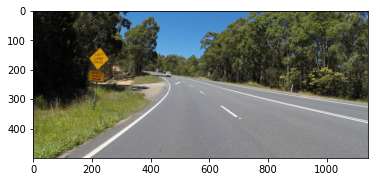

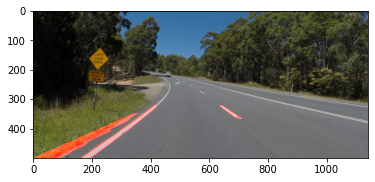

In [37]:
# rendering detected Hough lines as an overlay

def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
        return
        
    # Make a copy of the original image.
    img = np.copy(img)

    # Create a blank image that matches the original in size.
    line_img = np.zeros(
        (
            height,
            width,
            color_channels
        ),
        dtype=np.uint8,
    )

    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            #cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
            cv2.line(line_img, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)
    
    # Merge the image with the lines onto the original.
    img = cv2.addWeighted(image, 0.8, line_img, 1.0, 0.0)
    
    # Return the modified image.
    return img

image = mpimg.imread('sample_lane.jpg')
plt.figure()
plt.imshow(image)
plt.show()

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#gray_image = cv2.cvtColor(np.float32(imgUMat), cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(
    cannyed_image,
    np.array(
        [region_of_interest_vertices],
        np.int32
    ),
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)

line_image = draw_lines(image, lines) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()

In [38]:
# create single linear represenatation of each line group (left & right)

left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []
for line in lines:
    for x1, y1, x2, y2 in line:
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        if math.fabs(slope) < 0.5: # <-- Only consider extreme slope
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])

In [39]:
min_y = image.shape[0] * (3 / 5) # <-- Just below the horizon
max_y = image.shape[0] # <-- The bottom of the image

In [40]:
poly_left = np.poly1d(np.polyfit(
    left_line_y,
    left_line_x,
    deg=1
))
left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))
poly_right = np.poly1d(np.polyfit(
    right_line_y,
    right_line_x,
    deg=1
))
right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

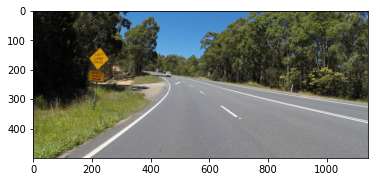

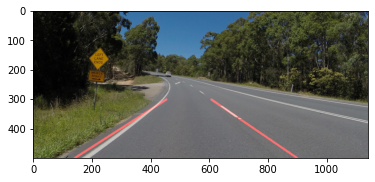

In [41]:
image = mpimg.imread('sample_lane.jpg')

plt.figure()
plt.imshow(image)

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(
    cannyed_image,
    np.array(
        [region_of_interest_vertices],
        np.int32
    ),
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []

for line in lines:
    for x1, y1, x2, y2 in line:
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        if math.fabs(slope) < .5: # <-- Only consider extreme slope
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])
            
min_y = image.shape[0] * (3 / 5) # <-- Just below the horizon
max_y = image.shape[0] # <-- The bottom of the image

poly_left = np.poly1d(np.polyfit(
    left_line_y,
    left_line_x,
    deg=1
))
left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))
poly_right = np.poly1d(np.polyfit(
    right_line_y,
    right_line_x,
    deg=1
))
right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))
line_image = draw_lines(
    image,
    [[
        [left_x_start, max_y, left_x_end, min_y],
        [right_x_start, max_y, right_x_end, min_y],
    ]],
    thickness=5,
)
plt.figure()
plt.imshow(line_image)
plt.show()

In [42]:
######################### Applying to video #########################

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8
    )
    img = np.copy(img)
    if lines is None:
        return
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    return img
def pipeline(image):
    """
    An image processing pipeline which will output
    an image with the lane lines annotated.
    """
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (0, height),
        (width / 2, height / 2),
        (width, height),
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    cannyed_image = cv2.Canny(gray_image, 100, 200)
 
    cropped_image = region_of_interest(
        cannyed_image,
        np.array(
            [region_of_interest_vertices],
            np.int32
        ),
    )
 
    lines = cv2.HoughLinesP(
        cropped_image,
        rho=6,
        theta=np.pi / 60,
        threshold=160,
        lines=np.array([]),
        minLineLength=40,
        maxLineGap=25
    )
 
    left_line_x = []
    left_line_y = []
    right_line_x = []
    right_line_y = []
 
    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1)
    #if math.fabs(slope) < 0.5:
     #   continue
    if slope <= 0:
        left_line_x.extend([x1, x2])
        left_line_y.extend([y1, y2])
    else:
        right_line_x.extend([x1, x2])
        right_line_y.extend([y1, y2])
    min_y = int(image.shape[0] * (3 / 5))
    max_y = int(image.shape[0])
    poly_left = np.poly1d(np.polyfit(
        left_line_y,
        left_line_x,
        deg=1
    ))
 
    left_x_start = int(poly_left(max_y))
    left_x_end = int(poly_left(min_y))
 
    poly_right = np.poly1d(np.polyfit(
        right_line_y,
        right_line_x,
       deg=1
    ))
 
    right_x_start = int(poly_right(max_y))
    right_x_end = int(poly_right(min_y))
    line_image = draw_lines(
        image,
        [[
            [left_x_start, max_y, left_x_end, min_y],
            [right_x_start, max_y, right_x_end, min_y],
        ]],
        thickness=5,
    )
    return line_image

In [73]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
white_output = 'solidWhiteRight_output.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(pipeline)
white_clip.write_videofile(white_output, audio=False)

TypeError: expected non-empty vector for x